In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import auc

In [23]:
# Import results
path = "./results"
results = os.listdir(path)

# Choose which to plot
r_path = f"{path}/compl8-eps0.01.csv"
r = pd.read_csv(r_path).drop("Unnamed: 0", axis=1)

n_bns = r.shape[1] - 3
r_bns = r.iloc[:,-n_bns:]
r_bns.head()

,power_BN_v_0,power_BN_v_1
0,0.000000,0.000000
1,0.024096,0.024096
2,0.096386,0.096386
3,0.096386,0.096386
4,0.096386,0.096386


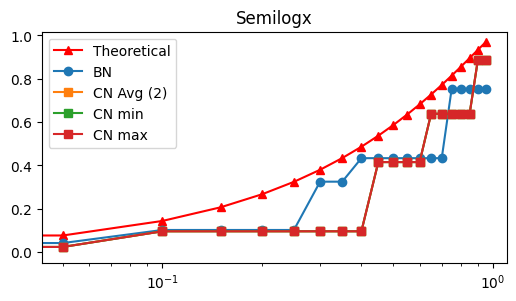

In [24]:
## Plot: error vs power
fig, ax = plt.subplots(1,1, figsize=(6, 3))

# Theoretical bound
ax.semilogx(r["error"], r["power_bound"], "r-^", label = 'Theoretical')

# BN
ax.semilogx(r["error"], r["power_BN"], "-o", label = 'BN')

# CN (avg, min, max)
ax.semilogx(r["error"], r_bns.mean(axis=1), "-s", label = f'CN Avg ({n_bns})')
ax.semilogx(r["error"], r_bns.min(axis=1), "-s", label = 'CN min')
ax.semilogx(r["error"], r_bns.max(axis=1), "-s", label = 'CN max')

# Plot info
ax.set(title='Semilogx')
ax.legend()

In [25]:
# Compute AUCs
print(f"BN AUC: {auc(r['error'], r['power_BN'])}")
print(f"CN Avg AUC: {auc(r['error'], r_bns.mean(axis=1))}")

BN AUC: 0.37635542168674696
CN Avg AUC: 0.34412650602409633
